In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{   'cavs_degenerate': {   'CELL TYPE': 'mid-cell',
                           'FREQ': 801.5798852145726,
                           'IC': [   42.0,
                                     23.0,
                                     42.5,
                                     57.5,
                                     70.24238959559739,
                                     93.5,
                                     172.95592583419793,
                                     104.87137815312366],
                           'OC': [   47.0,
                                     23.0,
                                     42.5,
                                     57.5,
                                     70.59919028624745,
                                     93.5,
                                     172.95592583419793,
                                     98.09144733045353],
            

<Axes: xlabel='$z$ [mm]', ylabel='$r$ [mm]'>

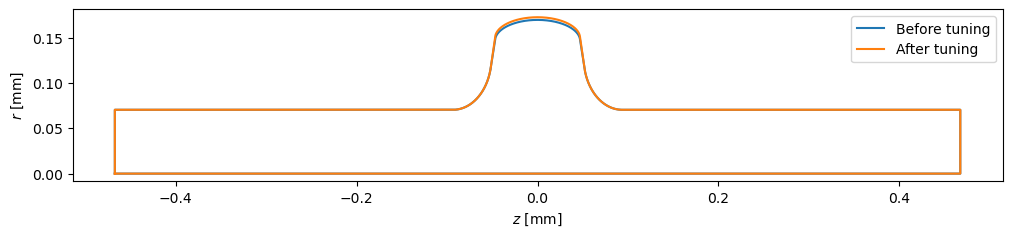

In [2]:
# define geometry parameters
midcell = np.array([42.0, 23.0, 42.5, 57.5, 70.24238959559739, 93.5, 170.0, 0])
endcell = np.array([47.0, 23.0, 42.5, 57.5, 70.59919028624745, 93.5, 170.0, 0])
endcell_r = np.array([47.0, 23.0, 42.5, 57.5, 70.59919028624745, 93.5, 170.0, 0])

# create cavity
cav_degenerate = Cavity(1, midcell, endcell, endcell, beampipe='both')
ax = cav_degenerate.plot('geometry', label='Before tuning')

cavs_degenerate = Cavities()
cavs_degenerate.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

cavs_degenerate.add_cavity(cav_degenerate, 'cavs_degenerate')

tune_config = {
    'freqs': 801.58,
    'parameters': 'Req',
    'cell_types': 'mid-cell',
    'processes': 1,
    'rerun': True,
    'eigenmode_config': {
        'processes': 3,
        'rerun': True,
        'boundary_conditions': 'mm',
        'uq_config': {
            'variables': ['A', 'B', 'a', 'b'],
            # 'objectives': ["freq [MHz]", "R/Q [Ohm]", "Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "G [Ohm]", "kcc [%]", "ff [%]"],
            'objectives': ["freq [MHz]", "Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "R/Q [Ohm]", "G [Ohm]"],
            # 'objectives': ["ZL"],
            'delta': [0.05, 0.05, 0.05, 0.05],
            'processes': 4,
            'distribution': 'gaussian',
            'method': ['Quadrature', 'Stroud3'],
            'cell_type': 'mid-cell',
            'cell complexity': 'simplecell'
            }
    },
    'uq_config': {
        'variables': ['A', 'B', 'a', 'b'],
        'delta': [0.05, 0.05, 0.05, 0.05],
        'objectives': ["freq [MHz]"],
        'processes': 4,
        'method': ['Quadrature', 'Stroud3'],
        'cell_type': 'mid-cell',
        'cell complexity': 'simplecell'
        }
}
cavs_degenerate.run_tune(tune_config)
# cavs_degenerate.run_tune('A', freqs=801.58, cell_types='end cell', rerun=True, solver='ngsolve', n_cells=1)
pp.pprint(cavs_degenerate.eigenmode_tune_res)

# plot geometry after tuning
cav_degenerate.plot('geometry', ax, label='After tuning')

In [3]:
ax_obj_dict = cavs_degenerate.save_plot_as_json(ax)

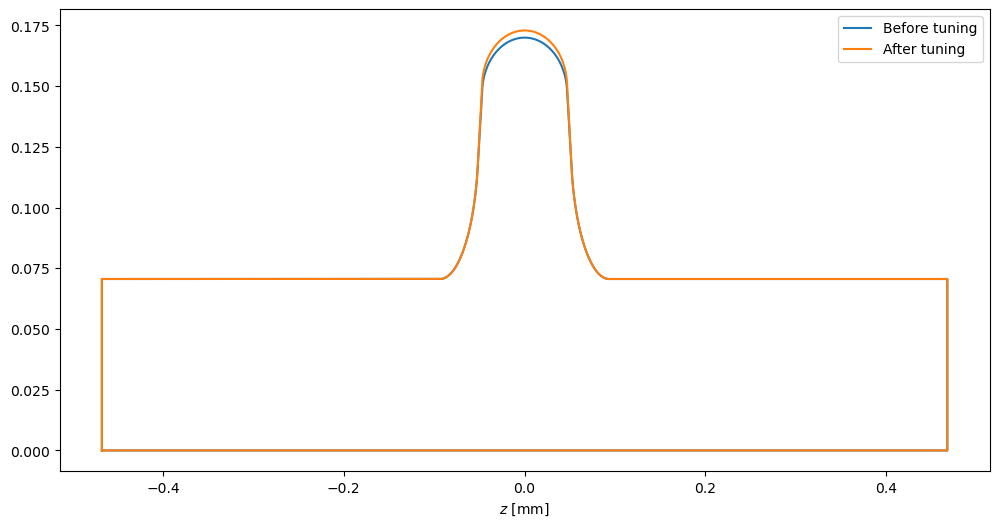

In [4]:
cavs_degenerate.plot_from_json(ax_obj_dict)

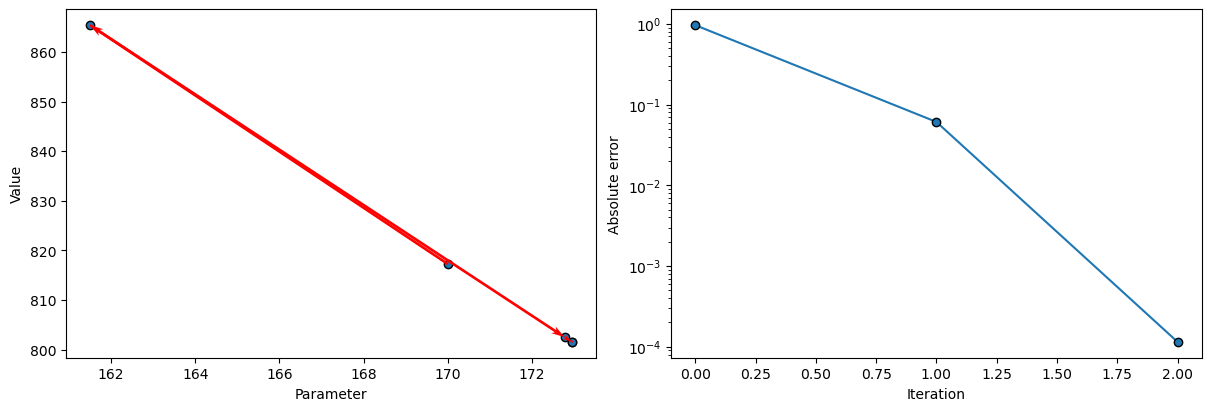

In [5]:
cavs_degenerate.plot('convergence')
plt.show()

In [11]:
cavs_degenerate.shape_space

{'cavs_degenerate': {'IC': [42.0,
   23.0,
   42.5,
   57.5,
   70.24238959559739,
   93.5,
   172.95592583419793,
   104.87137815312366],
  'OC': [47.0,
   23.0,
   42.5,
   57.5,
   70.59919028624745,
   93.5,
   172.95592583419793,
   98.09144733045353],
  'OC_R': [47.0,
   23.0,
   42.5,
   57.5,
   70.59919028624745,
   93.5,
   172.95592583419793,
   98.09144733045353],
  'BP': 'both',
  'n_cells': 1,
  'CELL TYPE': 'simplecell'}}

In [12]:
cavs_degenerate.shape_space['cavs_degenerate']['BP'] = 'none'

In [13]:
cavs_degenerate.shape_space['cavs_degenerate']['OC'] = cavs_degenerate.shape_space['cavs_degenerate']['IC']

In [14]:
cavs_degenerate.shape_space['cavs_degenerate']['OC_R'] = cavs_degenerate.shape_space['cavs_degenerate']['IC']

In [15]:
cavs_degenerate.run_eigenmode()

In [16]:
cavs_degenerate.eigenmode_qois

{'cavs_degenerate': {'Req [mm]': 172.95592583419793,
  'Normalization Length [mm]': 187.0,
  'N Cells': 1,
  'freq [MHz]': 801.5717949142036,
  'Q []': 31365.86871372088,
  'Vacc [MV]': 3.5259191846094327e-06,
  'Eacc [MV/m]': 1.8855182805398035e-05,
  'Epk [MV/m]': 3.6164498906865115e-05,
  'Hpk [A/m]': 0.08140512690098546,
  'Bpk [mT]': 0.00010229669945467231,
  'kcc [%]': 0.0,
  'ff [%]': 100.0,
  'Rsh [MOhm]': 2.7834352066620127,
  'R/Q [Ohm]': 88.74089323227989,
  'Epk/Eacc []': 1.9180136984146137,
  'Bpk/Eacc [mT/MV/m]': 5.425388897602512,
  'G [Ohm]': 228.55212964833808,
  'GR/Q [Ohm^2]': 20281.92013513336}}

<Axes: xlabel='$z$ [mm]', ylabel='$r$ [mm]'>

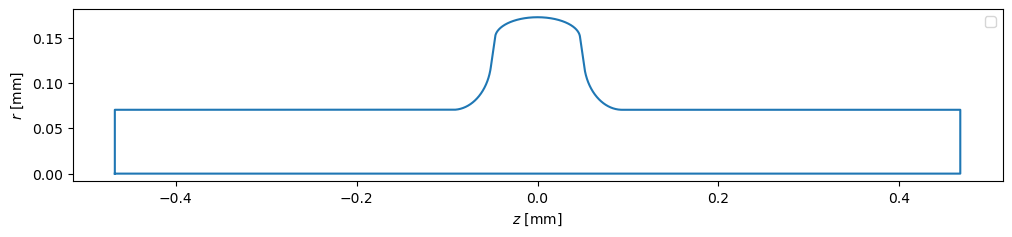

In [17]:
cavs_degenerate.plot('geometry')